In [1]:
#Connect to Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install ipdb
!pip install mat4py
!pip install ssqueezepy
!pip install statsmodels
!pip install sympy


In [18]:
!pip install torch==2.0.1 torchvision==0.15.2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 902.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 89.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [19]:
!pip install --upgrade sympy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 40.6 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.5.1+cu121 requires torch==2.5.1, but you have torch 2.0.1 which is incompatible.


In [ ]:
import sympy
import sympy.printing
if not hasattr(sympy.printing, 'str'):
    sympy.printing.str = str  # Temporary fix


In [ ]:
cd /content/drive/MyDrive/Aria

/content/drive/MyDrive/Aria


In [4]:
cd /content/drive/MyDrive/Aria/aria-bvp-mwl

/content/drive/MyDrive/Aria/aria-bvp-mwl


In [ ]:
!python preprocess.py

Traceback (most recent call last):
  File "/content/drive/MyDrive/Aria/aria-bvp-mwl/preprocess.py", line 21, in <module>
    from statsmodels.tsa.seasonal import seasonal_decompose
ModuleNotFoundError: No module named 'statsmodels'


In [ ]:
import preprocess
from preprocess import load_subject_sensor, load_nasa_tlx, map_subjective_workload, preprocess_aria

done with  S13
done with  S15
done with  S16
done with  S17
done with  S18
done with  S19
done with  S20
done with  S21
done with  S22
done with  S23
done with  S24
done with  S25
done with  S26
done with  S27
done with  S28
done with  S29
done with  S30


### Draft

In [ ]:
import load_data
from load_data import get_walk_sbj_sensor

# Example usage
walk_sbj = 'S14'  # Replace with the subject ID you want to use
bvp_dict = get_walk_sbj_sensor(sbj=walk_sbj, sensor='bvp')

# Print results
print("BVP Dictionary Keys:", bvp_dict.keys())

BVP Dictionary Keys: dict_keys(['SR', 'WR', 'L0', 'L1', 'L2', 'L3'])


In [ ]:
for i, (key, val) in enumerate(bvp_dict.items()):
    print(f"Condition: {key}, Data Shape: {val['bvp'].shape}")

Condition: SR, Data Shape: (8075,)
Condition: WR, Data Shape: (19465,)
Condition: L0, Data Shape: (23449,)
Condition: L1, Data Shape: (25056,)
Condition: L2, Data Shape: (26255,)
Condition: L3, Data Shape: (27355,)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def visualize_bvp_data(bvp_dict, condition):
    """
    Visualize Blood Volume Pressure (BVP) data for a given condition.

    Parameters:
    - bvp_dict: Dictionary containing BVP data.
    - condition: The specific condition (e.g., 'L0', 'L1', etc.) to visualize.
    """
    if condition not in bvp_dict:
        print(f"BVP data for condition '{condition}' is missing.")
        return

    bvp_data = bvp_dict[condition]

    # Ensure the BVP data contains the necessary columns
    if 'seconds' not in bvp_data.columns or 'bvp' not in bvp_data.columns:
        print(f"BVP data for condition '{condition}' is missing required columns: 'seconds' and 'bvp'.")
        return

    # Create a plot for BVP data
    plt.figure(figsize=(10, 6))
    plt.plot(bvp_data['seconds'], bvp_data['bvp'], label='Blood Volume Pressure', color='red')
    plt.title(f"Blood Volume Pressure (BVP) for Condition: {condition}", fontsize=16)
    plt.xlabel('Time (seconds)', fontsize=12)
    plt.ylabel('BVP (arbitrary units)', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

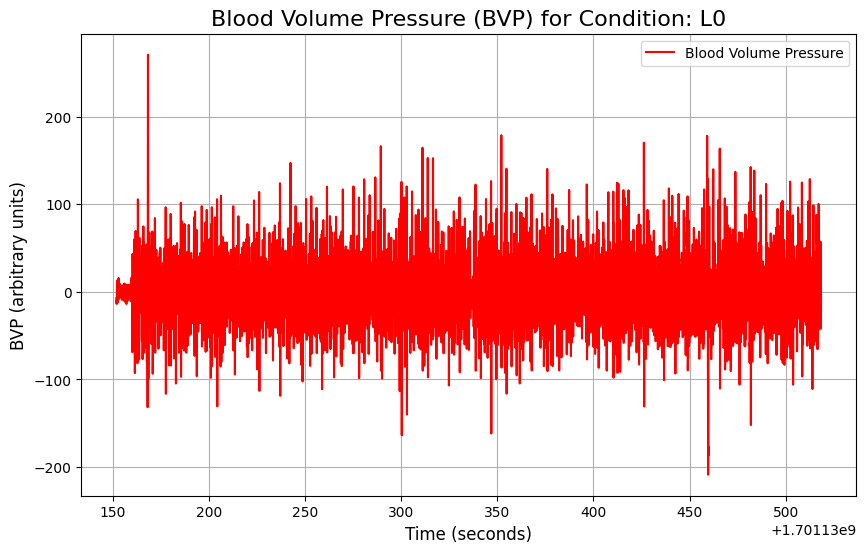

In [ ]:
visualize_bvp_data(bvp_dict, condition='L0')

In [ ]:
import bvp_mwl_process
from bvp_mwl_process import *

In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.ndimage import uniform_filter1d
from scipy.signal import butter, sosfilt

In [ ]:
def clean_bvp_data(bvp_dict, fs=64, output_dir="cleaned_data"):
    """
    Clean BVP data and save each condition as a CSV.

    Parameters:
    - bvp_dict: Dictionary containing raw BVP data for each condition.
    - fs: Sampling frequency.
    - output_dir: Directory to save cleaned CSV files.

    Returns:
    - cleaned_bvp_dict: Dictionary with cleaned BVP data for each condition.
    """
    os.makedirs(output_dir, exist_ok=True)
    cleaned_bvp_dict = {}

    for condition, bvp_data in bvp_dict.items():
        print(f"Processing condition: {condition}")

        # Ensure 'bvp' column exists
        if 'bvp' not in bvp_data.columns:
            print(f"Condition {condition} missing 'bvp' column. Skipping.")
            continue

        raw_bvp = bvp_data['bvp'].values
        filtered_bvp = bvp_signal_processing(raw_bvp, fs=fs)

        # Filter valid windows
        valid_bvp = []
        for i in range(0, len(filtered_bvp), fs):  # 1-second windows
            window = filtered_bvp[i:i + fs]
            if len(window) == fs and filter_samples(window, fs=fs):
                valid_bvp.extend(window)

        # Save cleaned data into a DataFrame
        cleaned_bvp_df = pd.DataFrame({
            'seconds': bvp_data['seconds'][:len(valid_bvp)],
            'bvp': valid_bvp
        })
        cleaned_bvp_dict[condition] = cleaned_bvp_df

        # Save each condition to a CSV file
        csv_path = os.path.join(output_dir, f"{condition}_cleaned.csv")
        cleaned_bvp_df.to_csv(csv_path, index=False)
        print(f"Saved cleaned data for condition {condition} to {csv_path}")

    return cleaned_bvp_dict


In [ ]:
output_directory = "/content/drive/MyDrive/Aria/preprocessed_data"  # Directory where CSV files will be saved
cleaned_bvp_dict = clean_bvp_data(bvp_dict, fs=64, output_dir=output_directory)

Processing condition: SR
Saved cleaned data for condition SR to /content/drive/MyDrive/Aria/preprocessed_data/SR_cleaned.csv
Processing condition: WR
Saved cleaned data for condition WR to /content/drive/MyDrive/Aria/preprocessed_data/WR_cleaned.csv
Processing condition: L0
Saved cleaned data for condition L0 to /content/drive/MyDrive/Aria/preprocessed_data/L0_cleaned.csv
Processing condition: L1
Saved cleaned data for condition L1 to /content/drive/MyDrive/Aria/preprocessed_data/L1_cleaned.csv
Processing condition: L2
Saved cleaned data for condition L2 to /content/drive/MyDrive/Aria/preprocessed_data/L2_cleaned.csv
Processing condition: L3
Saved cleaned data for condition L3 to /content/drive/MyDrive/Aria/preprocessed_data/L3_cleaned.csv


In [ ]:
def plot_cleaned_bvp(output_dir):
    """
    Load preprocessed data from CSV files and plot them.

    Parameters:
    - output_dir: Directory containing cleaned CSV files.
    """
    csv_files = [f for f in os.listdir(output_dir) if f.endswith("_cleaned.csv")]

    for csv_file in csv_files:
        condition = os.path.splitext(csv_file)[0].replace("_cleaned", "")
        file_path = os.path.join(output_dir, csv_file)

        # Load the CSV file
        data = pd.read_csv(file_path)

        # Plot the data
        plt.figure(figsize=(10, 6))
        plt.plot(data['seconds'], data['bvp'], label=f"Condition: {condition}")
        plt.title(f"Preprocessed BVP Data for Condition: {condition}", fontsize=16)
        plt.xlabel("Time (seconds)", fontsize=12)
        plt.ylabel("BVP (arbitrary units)", fontsize=12)
        plt.legend()
        plt.grid(True)
        plt.show()

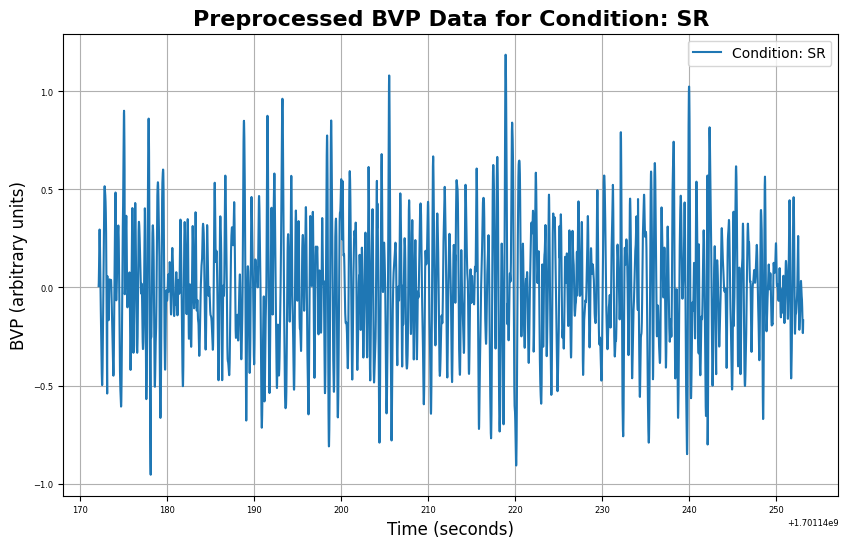

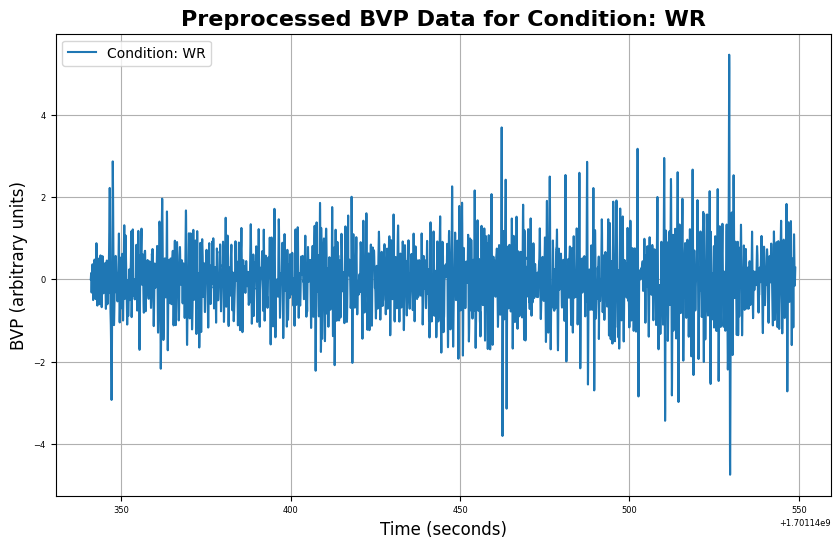

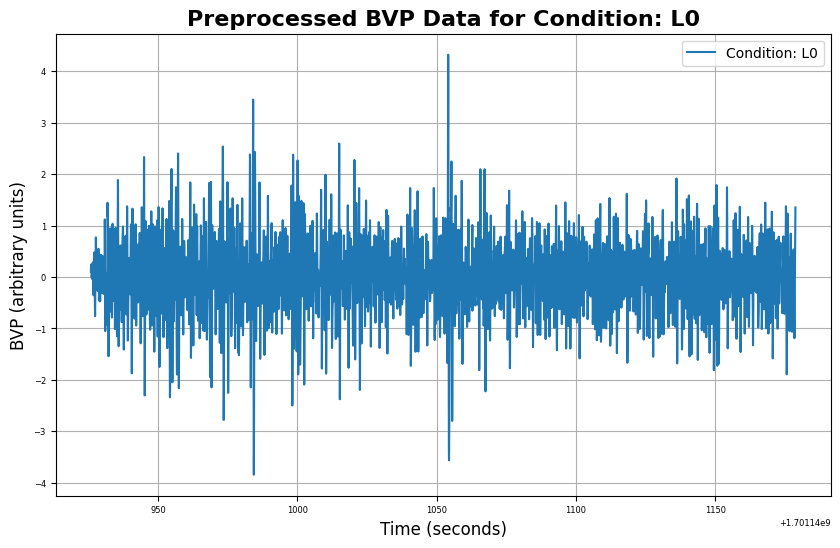

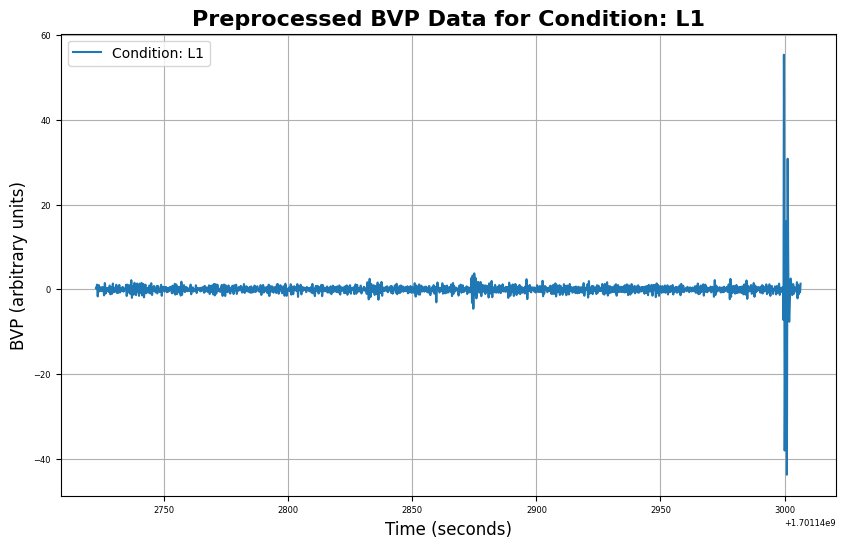

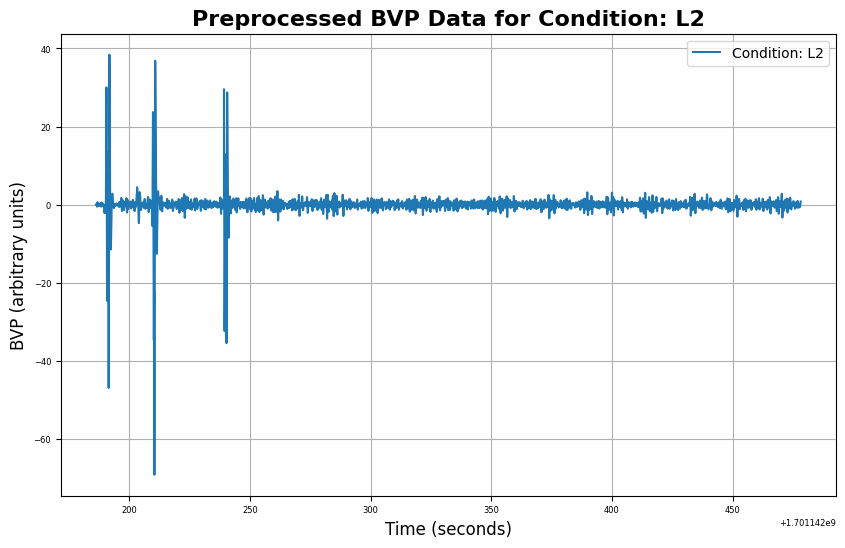

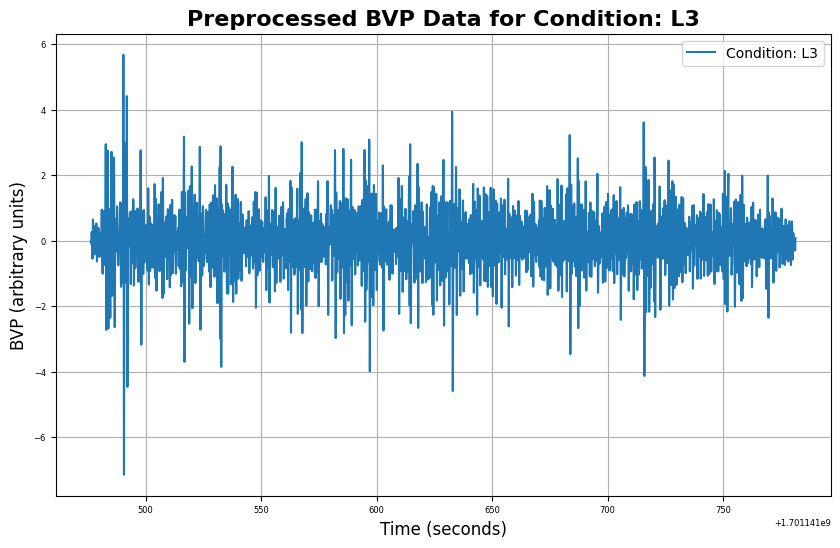

In [ ]:
plot_cleaned_bvp(output_directory)

### Exploration

In [ ]:
import os
import pandas as pd
import pickle

In [ ]:
base_path = "/content/drive/MyDrive/Aria/scratch/aria_dataset/60_30"

In [ ]:
pkl_files = [f for f in os.listdir(base_path) if f.endswith('.pkl')]

# Load and print each pickle file
for file in pkl_files:
    file_path = os.path.join(base_path, file)
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
        print(f"Contents of {file}:")
        print(data)
        print("-" * 50)

Contents of S13_train.pkl:
{'samples': array([[-78.4 , -82.52, -80.77, ..., 112.6 ,  93.77,  58.86],
       [ 44.89,  47.57,  50.73, ...,  71.57,  74.66,  70.8 ],
       [-16.4 ,  -1.15,  11.65, ...,  95.8 ,  72.13,  39.71],
       ...,
       [100.68, 108.74, 108.28, ...,  -9.65,  -8.38,  -1.23],
       [ 32.59,  43.81,  51.04, ...,   5.48,   7.96,  10.22],
       [ -1.08,  -4.52,  -5.37, ...,   8.57,   9.26,   7.14]]), 'wtlx': array([0.3021474 , 0.        , 0.3021474 , 0.45322111, 0.45322111,
       0.23017158, 0.3021474 , 0.        , 0.        , 0.23017158,
       0.12949174, 0.23017158, 0.12949174, 0.45322111, 0.        ,
       0.        , 0.3021474 , 0.        , 0.23017158, 0.3021474 ,
       0.45322111, 0.12949174, 0.12949174, 0.        , 0.3021474 ,
       0.12949174, 0.        , 0.45322111, 0.45322111, 0.23017158,
       0.3021474 , 0.12949174, 0.45322111, 0.23017158, 0.12949174,
       0.        , 0.23017158, 0.        ]), 'labels': array([ 3., -1.,  3.,  4.,  4.,  2.,  3., -

In [ ]:
def check_labels_in_pkl(base_path):
    # List all .pkl files in the directory
    pkl_files = [f for f in os.listdir(base_path) if f.endswith('.pkl')]

    # Iterate through each .pkl file
    for file in pkl_files:
        file_path = os.path.join(base_path, file)
        print(f"Checking file: {file}")
        try:
            # Load the .pkl file
            with open(file_path, 'rb') as f:
                data = pickle.load(f)

            # Check if 'labels' key exists
            if 'labels' in data:
                print(f"✅ 'labels' key found in {file}")
                print(f"Labels: {data['labels']}\n")
            else:
                print(f"❌ 'labels' key NOT found in {file}\n")

        except Exception as e:
            print(f"Error loading file {file}: {e}\n")

In [ ]:
check_labels_in_pkl(base_path)


Checking file: S13_train.pkl
✅ 'labels' key found in S13_train.pkl
Labels: [ 3. -1.  3.  4.  4.  2.  3. -3. -3.  2.  1.  2.  1.  4. -3. -3.  3. -3.
  2.  3.  4.  1.  1. -2.  3.  1. -3.  4.  4.  2.  3.  1.  4.  2.  1. -1.
  2. -2.]

Checking file: S13_val.pkl
✅ 'labels' key found in S13_val.pkl
Labels: [-2. -3.  4.  1.  2.  1.  4.  2. -3.  2.  3.  3.  3.]

Checking file: S13_test.pkl
✅ 'labels' key found in S13_test.pkl
Labels: [-3. -2.  4.  4.  1. -3.  4.  1.  2.  3.  3.  2.  3.]

Checking file: S15_train.pkl
✅ 'labels' key found in S15_train.pkl
Labels: [ 3.  1.  4.  3. -3. -1. -3. -3.  1.  4.  4.  1. -2.  4.  2.  1.  2.  4.
  3. -3.  4.  3. -2. -3.  4.  3.  1.  2. -3.  4.  2.  1. -2.  4.  1.  2.
  2.  2.  4.]

Checking file: S15_val.pkl
✅ 'labels' key found in S15_val.pkl
Labels: [ 1.  3.  3.  3.  2.  4.  2.  1.  1. -3. -3.  3.  2.]

Checking file: S15_test.pkl
✅ 'labels' key found in S15_test.pkl
Labels: [ 4. -3.  2.  3.  4. -2. -1. -3.  2.  3.  1.  4.  1.]

Checking file: S16_train

### Classifier

In [5]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import numpy as np
import pickle

In [59]:
class AriaDataset(Dataset):
    def __init__(self, pkl_files, conditions):
        self.pkl_files = pkl_files
        self.conditions = {k: i for i, k in enumerate(sorted(conditions.keys()))}  # Remap to [0, 1, 2, ...]
        self.data = []
        self.labels = []

        for pkl_file in self.pkl_files:
            with open(pkl_file, 'rb') as f:
                content = pickle.load(f)
                self.data.append(content['samples'])
                self.labels.append([self.conditions[label] for label in content['labels']])

        self.data = np.vstack(self.data)
        self.labels = np.hstack(self.labels)

    def __getitem__(self, idx):
        x = self.data[idx]
        y = self.labels[idx]
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.data)

In [54]:
#CNN1D Backbone
class CNN1DBackbone(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, output_dim=64):
        super(CNN1DBackbone, self).__init__()
        self.network = nn.Sequential(
            nn.Conv1d(1, hidden_dim, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv1d(hidden_dim, hidden_dim, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1),
        )
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.network(x).squeeze(-1)
        x = self.fc(x)
        return x

In [57]:
class PrototypicalNetwork(nn.Module):
    def __init__(self, input_dim):
        super(PrototypicalNetwork, self).__init__()
        self.encoder = CNN1DBackbone(input_dim=input_dim)

    def forward(self, support, query):
        support_embeddings = self.encoder(support)
        query_embeddings = self.encoder(query)
        prototypes = support_embeddings.view(8, -1, support_embeddings.size(1)).mean(dim=1)
        distances = torch.cdist(query_embeddings, prototypes)
        return distances

In [60]:
def train(dataloader, model, criterion, optimizer, device, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for batch_idx, (x, y) in enumerate(dataloader):
            # Skip batches smaller than 16
            if x.size(0) < 16:
                print(f"Skipping batch {batch_idx} with size {x.size(0)}")
                continue

            x, y = x.to(device), y.to(device)
            support, query = x[:8], x[8:]  # Support and query split
            labels = y[8:]

            distances = model(support, query)
            loss = criterion(-distances, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss / len(dataloader):.4f}")

In [61]:
def get_files(directory, keyword):
    return [os.path.join(directory, f) for f in os.listdir(directory) if keyword in f and f.endswith('.pkl')]

In [65]:
def evaluate(dataloader, model, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, (x, y) in enumerate(dataloader):
            x, y = x.to(device), y.to(device)
            support, query = x[:8], x[8:]
            labels = y[8:]
            distances = model(support, query)
            predictions = torch.argmin(distances, dim=1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)
    accuracy = correct / total if total > 0 else 0
    print(f"Evaluation Accuracy: {accuracy * 100:.2f}%")
    return accuracy

In [66]:
base_dir = "/content/drive/MyDrive/Aria/scratch/aria_dataset/60_30"
train_files = get_files(base_dir, "train")
test_files = get_files(base_dir, "test")

conditions = {
    -1: 'P',
    -2: 'SR',
    -3: 'WR',
      1: 'L0',
      2: 'L1',
      3: 'L2',
      4: 'L3'
}
#DataLoader
train_dataset = AriaDataset(train_files, conditions)
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)

test_dataset = AriaDataset(test_files, conditions)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False)

Skipping batch 40 with size 7
Epoch [1/10], Loss: 3.4221
Skipping batch 40 with size 7
Epoch [2/10], Loss: 2.1072
Skipping batch 40 with size 7
Epoch [3/10], Loss: 2.0286
Skipping batch 40 with size 7
Epoch [4/10], Loss: 2.0274
Skipping batch 40 with size 7
Epoch [5/10], Loss: 2.0311
Skipping batch 40 with size 7
Epoch [6/10], Loss: 2.0306
Skipping batch 40 with size 7
Epoch [7/10], Loss: 2.0305
Skipping batch 40 with size 7
Epoch [8/10], Loss: 2.0290
Skipping batch 40 with size 7
Epoch [9/10], Loss: 2.0292
Skipping batch 40 with size 7
Epoch [10/10], Loss: 2.0290
Training Complete.


In [ ]:
#Training process
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = PrototypicalNetwork(input_dim=train_dataset.data.shape[1]).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

train(train_dataloader, model, criterion, optimizer, device, epochs=10)

In [68]:
evaluate(test_dataloader, model, device)

Evaluation Accuracy: 14.29%


0.14285714285714285